In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
digits_traiin = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)

In [3]:
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

In [4]:
X_train = digits_traiin[np.arange(64)]
Y_train = digits_traiin[64]

In [5]:
X_tesy = digits_test[np.arange(64)]
Y_test = digits_test[64]

In [6]:
#显示手写数字图片的特征经过PCA压缩后的二维空间分布
from sklearn.decomposition import PCA

In [7]:
#初始化一个可以讲高纬度特征向量（六十四维）压缩到2个纬度的PCA
estimator = PCA(n_components=2)

In [8]:
X_pca = estimator.fit_transform(X_train)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


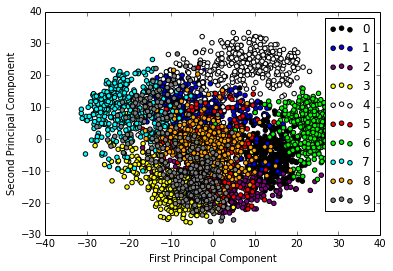

In [9]:
def plot_pca_scatter():
    colors = ['black','blue','purple','yellow','white','red','lime','cyan','orange','gray']
    for i in range(len(colors)):
        px = X_pca[:,0][Y_train.as_matrix()==i]
        py = X_pca[:,1][Y_train.as_matrix()==i]
        plt.scatter(px, py, c = colors[i])
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
plot_pca_scatter()

In [10]:
#使用压缩后的未读进行训练，取20个特征
estimator = PCA(n_components=20)

In [11]:
pca_X_train = estimator.fit_transform(X_train)

In [12]:
pca_X_test = estimator.transform(X_tesy)

In [13]:
from sklearn.svm import LinearSVC

In [14]:
svc = LinearSVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_tesy)
print y_pred

[0 1 1 ..., 8 9 8]


In [15]:
pca_svc = LinearSVC()

In [16]:
pca_svc.fit(pca_X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [17]:
pca_y_pred = pca_svc.predict(pca_X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred = y_pred.reshape(-1,1)
pca_y_pred = pca_y_pred.reshape(-1,1)
print svc.score(X_tesy, Y_test)
print classification_report(Y_test, y_pred, target_names=np.arange(10).astype(str))
print pca_svc.score(pca_X_test, Y_test)
print classification_report(Y_test, pca_y_pred, target_names=np.arange(10).astype(str))

0.927100723428
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       178
          1       0.75      0.98      0.85       182
          2       0.99      0.95      0.97       177
          3       0.98      0.92      0.95       183
          4       0.95      0.96      0.95       181
          5       0.89      0.96      0.93       182
          6       0.99      0.97      0.98       181
          7       0.98      0.91      0.94       179
          8       0.87      0.80      0.83       174
          9       0.95      0.84      0.89       180

avg / total       0.93      0.93      0.93      1797

0.923761825264
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       178
          1       0.90      0.89      0.90       182
          2       0.97      0.98      0.97       177
          3       0.96      0.90      0.93       183
          4       0.94      0.97      0.96       181
          5 